# Linear Regression

First let's import the neccessary libraries

In [75]:
import numpy as np #efficient numerical computations
import scipy #python library for scientific computing
import random
import pylab
import matplotlib.pyplot as plt #for plotting
import seaborn as sns #extra plot types, elegant styles
sns.set(style="white", color_codes=True)
import pandas as pd #data structures for data analysis

import warnings
warnings.filterwarnings("ignore")

__Setting up the linear toy problem__

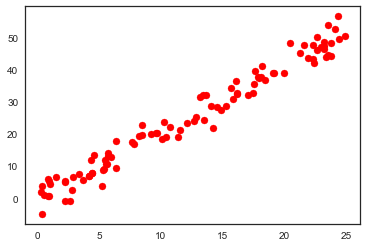

In [112]:
N=100
spanx=25
np.random.seed(88)
x = np.random.uniform(0,spanx,N)
y = 2*x + 1
noise = np.random.normal(0,3,N)
y = y + noise
plt.scatter(x,y, color="red")

plt.show()
y=np.reshape(y,(N,1))

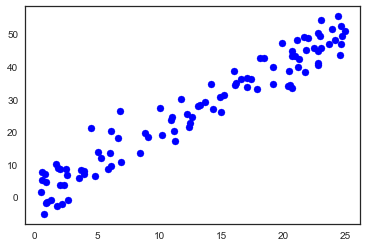

In [77]:
#testing the linear toy problem

N = 100
spanx = 25
x = np.random.uniform(0,spanx,N)


def plot(seed):
    np.random.seed(seed)

    y = 2*x + 1

    noise = np.random.normal(0,5,N)

    y = y + noise
    plt.scatter(x,y, color="blue")
    plt.show()
    
plot(88)
y = np.reshape(y, (N, 1))




Cost Function:
---------------
__Mean Squared Error (MSE)__

If $y^{(i)}$ is the actual data point, and $z^{(i)}$ be the predicted value by the model, 
\begin{equation*}
RMSE = \frac{1}{2N}\sum_{i=1}^{N}\big(z^{(i)} - y^{(i)}\big)^2
\end{equation*}

Gradient
---------
For hypothesis $h_{\theta}(x) = \theta_0 + \theta_1x \Rightarrow z^{(i)} =\theta_0 + \theta_1x^{(i)}$

\begin{equation*}
\frac{\partial h}{\partial \theta_0} = \frac{1}{N}\sum_{i=1}^{N}\big(z^{(i)} - y^{(i)}\big)
\end{equation*}

\begin{equation*}
\frac{\partial h}{\partial \theta_1} = \frac{1}{N}\sum_{i=1}^{N}\big(z^{(i)} - y^{(i)}\big).x^{(i)}
\end{equation*}


In [78]:
def sq_err(y,z):
    y_actual = np.array(y)
    y_pred = np.array(z)
    error = (y_actual - y_pred)**2
    error_mean = np.round(0.5*np.mean(error))
    return error_mean

Batch Gradient Descent
-----------------


__alpha__: The learning rate for gradient descent. It is a hyperparameter. Typical values of 0.1 to 0.001

__epochs__: the no. of steps taken

In [113]:
x = np.reshape(x, (N,1))
X = np.column_stack((np.ones(N),x)) #N x 2 matrix
X.shape


(100, 2)

In [114]:
theta = np.zeros(2)
theta = np.reshape(theta, (2,1)) #2 x 1 vector
h=X@theta
h.shape

(100, 1)

In [115]:
y.shape

(100, 1)

In [82]:
# df_x = pd.DataFrame(X)
# df_x.head(N)

In [116]:
alpha = 0.0003
total_epoch = 10000

theta = np.zeros(2)
theta = np.reshape(theta, (2,1)) #2 x 1 vector
lossHistory = np.zeros([1,total_epoch]).T #total_epoch x 1 vector
t_e = np.zeros([2,total_epoch]).T

for epoch in range(total_epoch):
    h=X@theta
    lossHistory[epoch] = sq_err(y,h)
    del0=0
    del1=0    
    t_e[epoch][0] = theta[0]
    t_e[epoch][1] = theta[1]
    
    for i in range(N):
        del0 = del0 + (h[i]-y[i])
        del1 = del1 + (h[i]-y[i])*x[i]
        
    del0 = del0/N
    del1 = del1/N
    grad = np.array([del0, del1])
    theta = theta - alpha*grad


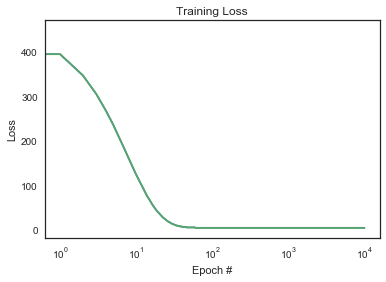

In [117]:
ep = np.linspace(0, total_epoch-1, total_epoch, endpoint=True)
plt.semilogx(ep, lossHistory, lossHistory)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

In [118]:
sq_err(y,h)

4.0

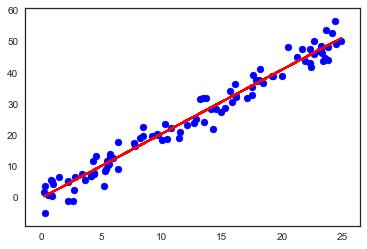

In [122]:
plt.plot(x, h, color='red')
plt.scatter(x, y, color='blue')
plt.show()

At epoch epoch_no, 5 theta_0= 0.082275,theta1= 1.423529.
At epoch epoch_no, 0 theta_0= 0.000000,theta1= 0.000000.
At epoch epoch_no, 1 theta_0= 0.072626,theta1= 1.255974.
At epoch epoch_no, 99 theta_0= 0.110728,theta1= 2.049687.
At epoch epoch_no, 999 theta_0= 0.045084,theta1= 2.053501.
At epoch epoch_no, 9999 theta_0= -0.158522,theta1= 2.065330.


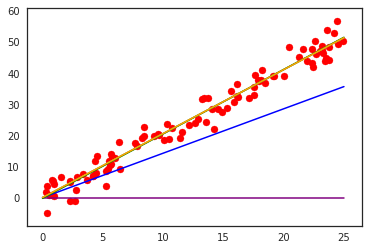

In [11]:
# t_e=np.around(t_e,3)
lx = np.linspace(0, spanx, 256, endpoint=True)

epoch_no=5
S = t_e[epoch_no][0]+t_e[epoch_no][1]*lx
plt.plot(lx, S, color="blue",  linewidth=1.5, linestyle="-")
print("At epoch epoch_no, %d theta_0= %f,theta1= %f." %(epoch_no, t_e[epoch_no][0], t_e[epoch_no][1]) )

S0 = t_e[0][0]+t_e[0][1]*lx
plt.plot(lx, S0, color="purple",  linewidth=1.5, linestyle="-")
print("At epoch epoch_no, %d theta_0= %f,theta1= %f." %(0, t_e[0][0], t_e[0][1]) )

print("At epoch epoch_no, %d theta_0= %f,theta1= %f." %(1, t_e[4][0], t_e[4][1]) )

S99 = t_e[99][0]+t_e[99][1]*lx
plt.plot(lx, S99, color="green",  linewidth=1.5, linestyle="-")
print("At epoch epoch_no, %d theta_0= %f,theta1= %f." %(99, t_e[99][0], t_e[99][1]) )

S999 = t_e[999][0]+t_e[999][1]*lx
plt.plot(lx, S999, color="pink",  linewidth=1.5, linestyle="-")
print("At epoch epoch_no, %d theta_0= %f,theta1= %f." %(999, t_e[999][0], t_e[999][1]) )

S_end = t_e[total_epoch-1][0]+t_e[total_epoch-1][1]*lx
plt.plot(lx, S_end, color="green",  linewidth=1.5, linestyle="-")
print("At epoch epoch_no, %d theta_0= %f,theta1= %f." %(total_epoch-1, t_e[total_epoch-1][0], t_e[total_epoch-1][1]) )

m = 1+ 2*lx
plt.plot(lx, S99, color="orange",  linewidth=1.5, linestyle="-")

plt.scatter(x,y, color="red")
plt.show()

Using Packages to perform Linear Regression
---------------------------------------
__sklearn__ is one such package that has inbuilt regressions

Modified from Source: http://scikit-learn.org/stable/auto_examples/plot_cv_predict.html#sphx-glr-auto-examples-plot-cv-predict-py

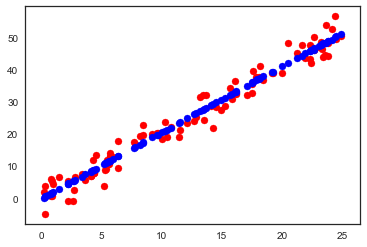

In [128]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas as pd

lr = linear_model.LinearRegression()
y=np.reshape(y,(-1,1))
x=np.reshape(x,(-1,1))
lin_fit = cross_val_predict(lr, x, y, cv=10)

#cv - cross validation

plt.scatter(x,y, color="red")
plt.scatter(x,lin_fit, color="blue")
plt.show()


In [143]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas as pd

lr = linear_model.LinearRegression()
print(type(lr))
boston = datasets.load_boston()

print(boston.DESCR)
type(boston.data)


<class 'sklearn.linear_model.base.LinearRegression'>
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000


numpy.ndarray

In [71]:
print("Size of dataset is" , boston.data.shape)
df_b = pd.DataFrame(boston.data)
df_b.columns = boston.feature_names
df_b['PRICE'] = boston.target
df_b.head(9) #shows the first 9 datapoints

Size of dataset is (506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5


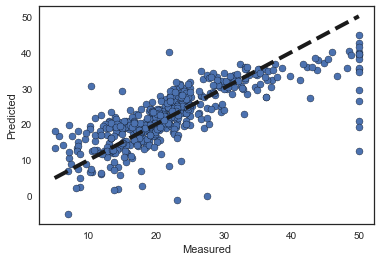

In [146]:
y = boston.target
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, boston.data, y, cv=10)

# ask what is going on here
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

Splitting Data
--------------------

In [59]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.arange(20).reshape((10, 2))
y = range(10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #train_size=0.5,

In [60]:
X

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11],
       [12, 13],
       [14, 15],
       [16, 17],
       [18, 19]])

In [61]:
X_train

array([[10, 11],
       [ 0,  1],
       [14, 15],
       [ 4,  5],
       [18, 19],
       [ 8,  9],
       [ 6,  7],
       [12, 13]])

In [62]:
X_test

array([[16, 17],
       [ 2,  3]])